In [114]:
#Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import shap
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency 
from imblearn.over_sampling import SMOTE


seed=1

In [115]:
#Read Data
Term_Deposit_data = pd.read_csv('term-deposit-marketing-2020.csv')

In [116]:
Term_Deposit_data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [117]:
#Continuous variables are shown below
Term_Deposit_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


<AxesSubplot:>

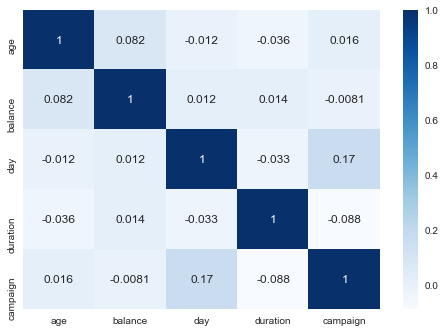

In [118]:
corr = Term_Deposit_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')

In [119]:
#The dataset is highly imbalanced. The ratio of client subscribed to a term deposit against not subscribed to a term deposit is 1 to 9 
print("Count of client subscribed to a term deposit: ", len(Term_Deposit_data[Term_Deposit_data["y"]=='yes']))
print("Count of client not subscribed to a term deposit: ", len(Term_Deposit_data[Term_Deposit_data["y"]=='no']))

Count of client subscribed to a term deposit:  2896
Count of client not subscribed to a term deposit:  37104


In [120]:
converted_term_deposit = pd.DataFrame()

In [121]:
#Categorical features need to be converted to numerics in data preprocessing

In [122]:
job_dict ={ job:i for i, job in enumerate(list(set(Term_Deposit_data['job'])))}
job_dict

{'unemployed': 0,
 'self-employed': 1,
 'services': 2,
 'technician': 3,
 'management': 4,
 'blue-collar': 5,
 'unknown': 6,
 'admin': 7,
 'retired': 8,
 'housemaid': 9,
 'student': 10,
 'entrepreneur': 11}

In [123]:
Term_Deposit_data['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

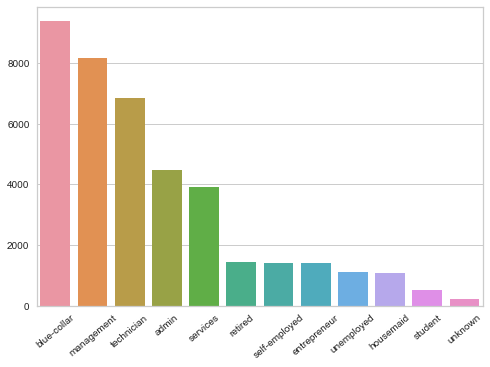

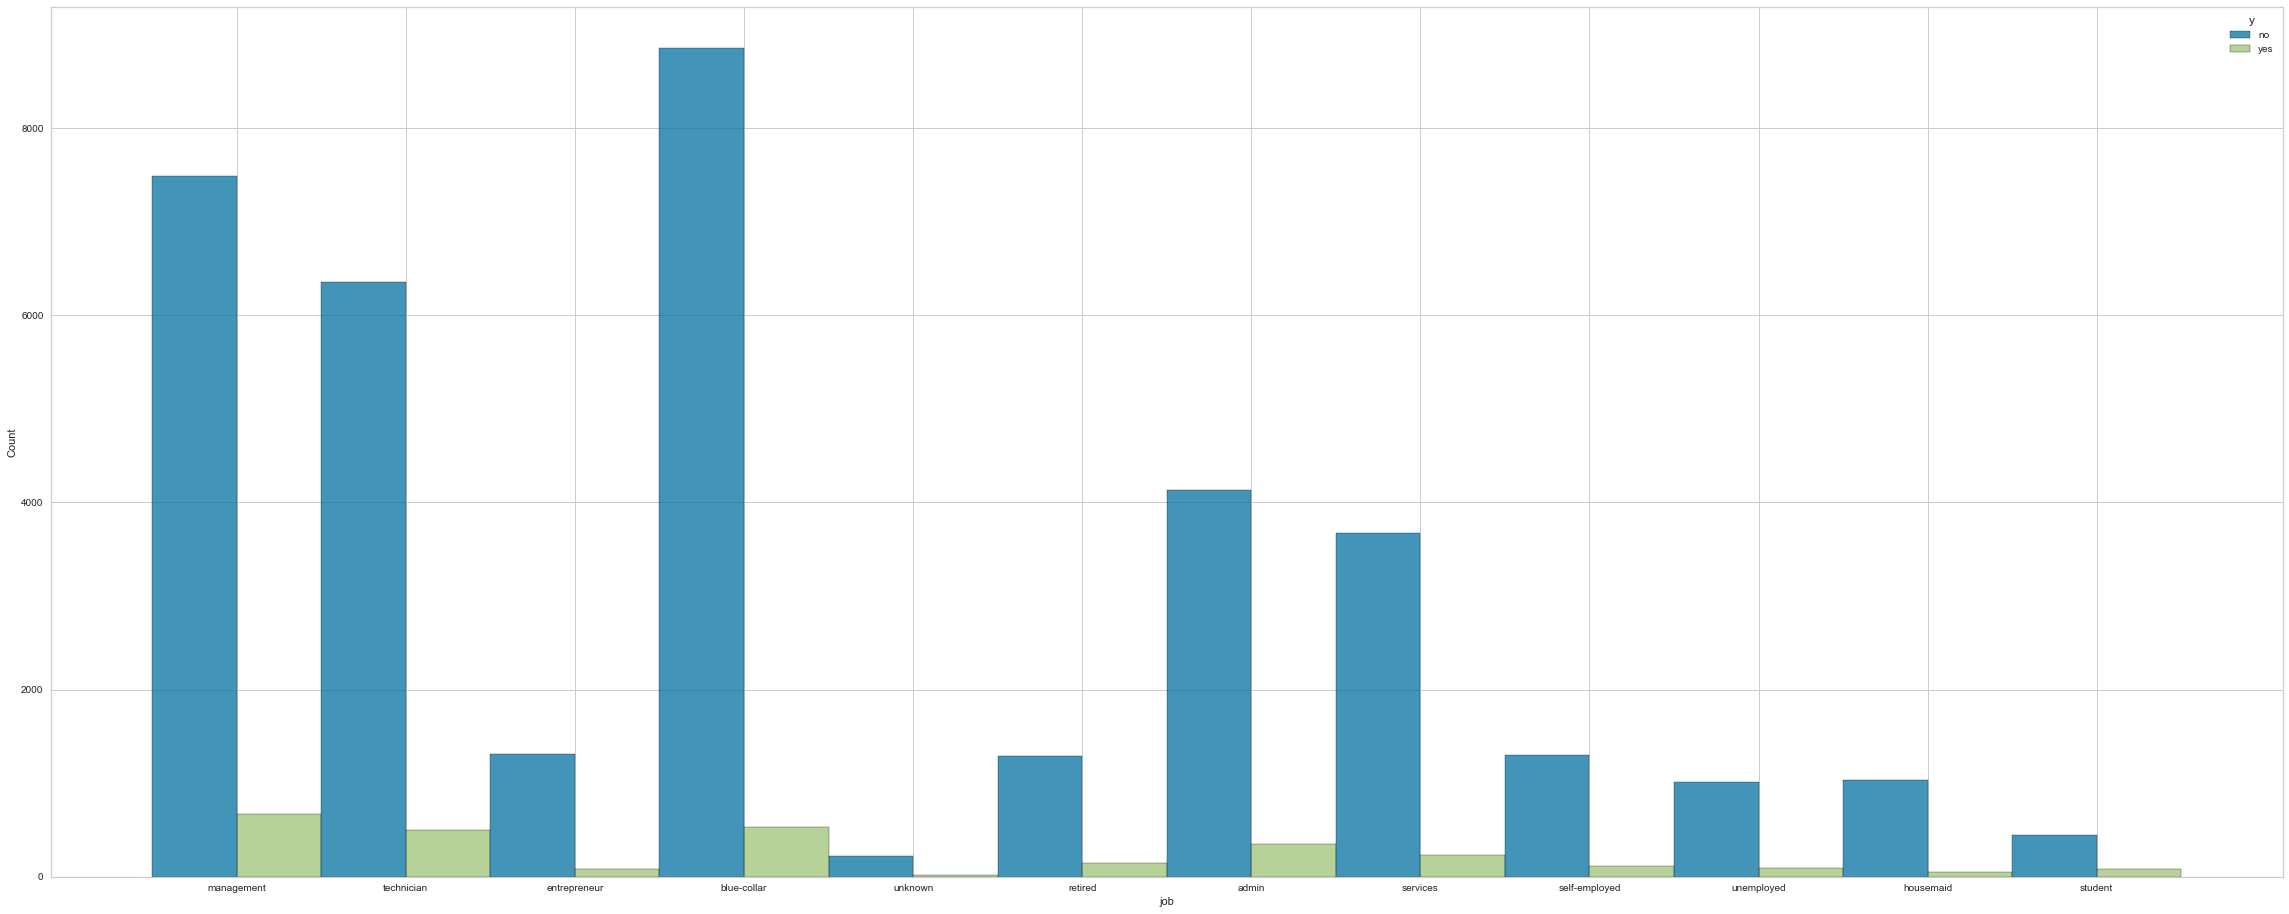

In [124]:
ax = sns.barplot(Term_Deposit_data['job'].value_counts().index, Term_Deposit_data['job'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='job', hue="y", multiple="dodge")
plt.show()

In [125]:
converted_term_deposit['job'] = Term_Deposit_data['job'].apply(lambda x: job_dict[x])

In [126]:
marital_dict ={ marital:i for i, marital in enumerate(list(set(Term_Deposit_data['marital'])))}
marital_dict

{'single': 0, 'married': 1, 'divorced': 2}

In [127]:
Term_Deposit_data['marital'].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

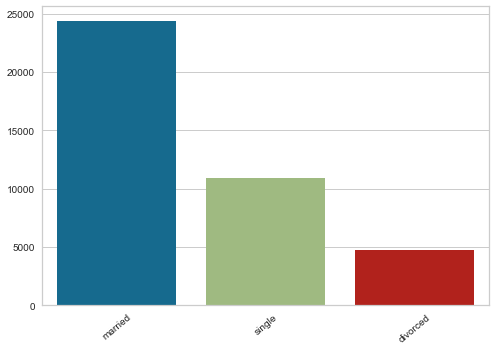

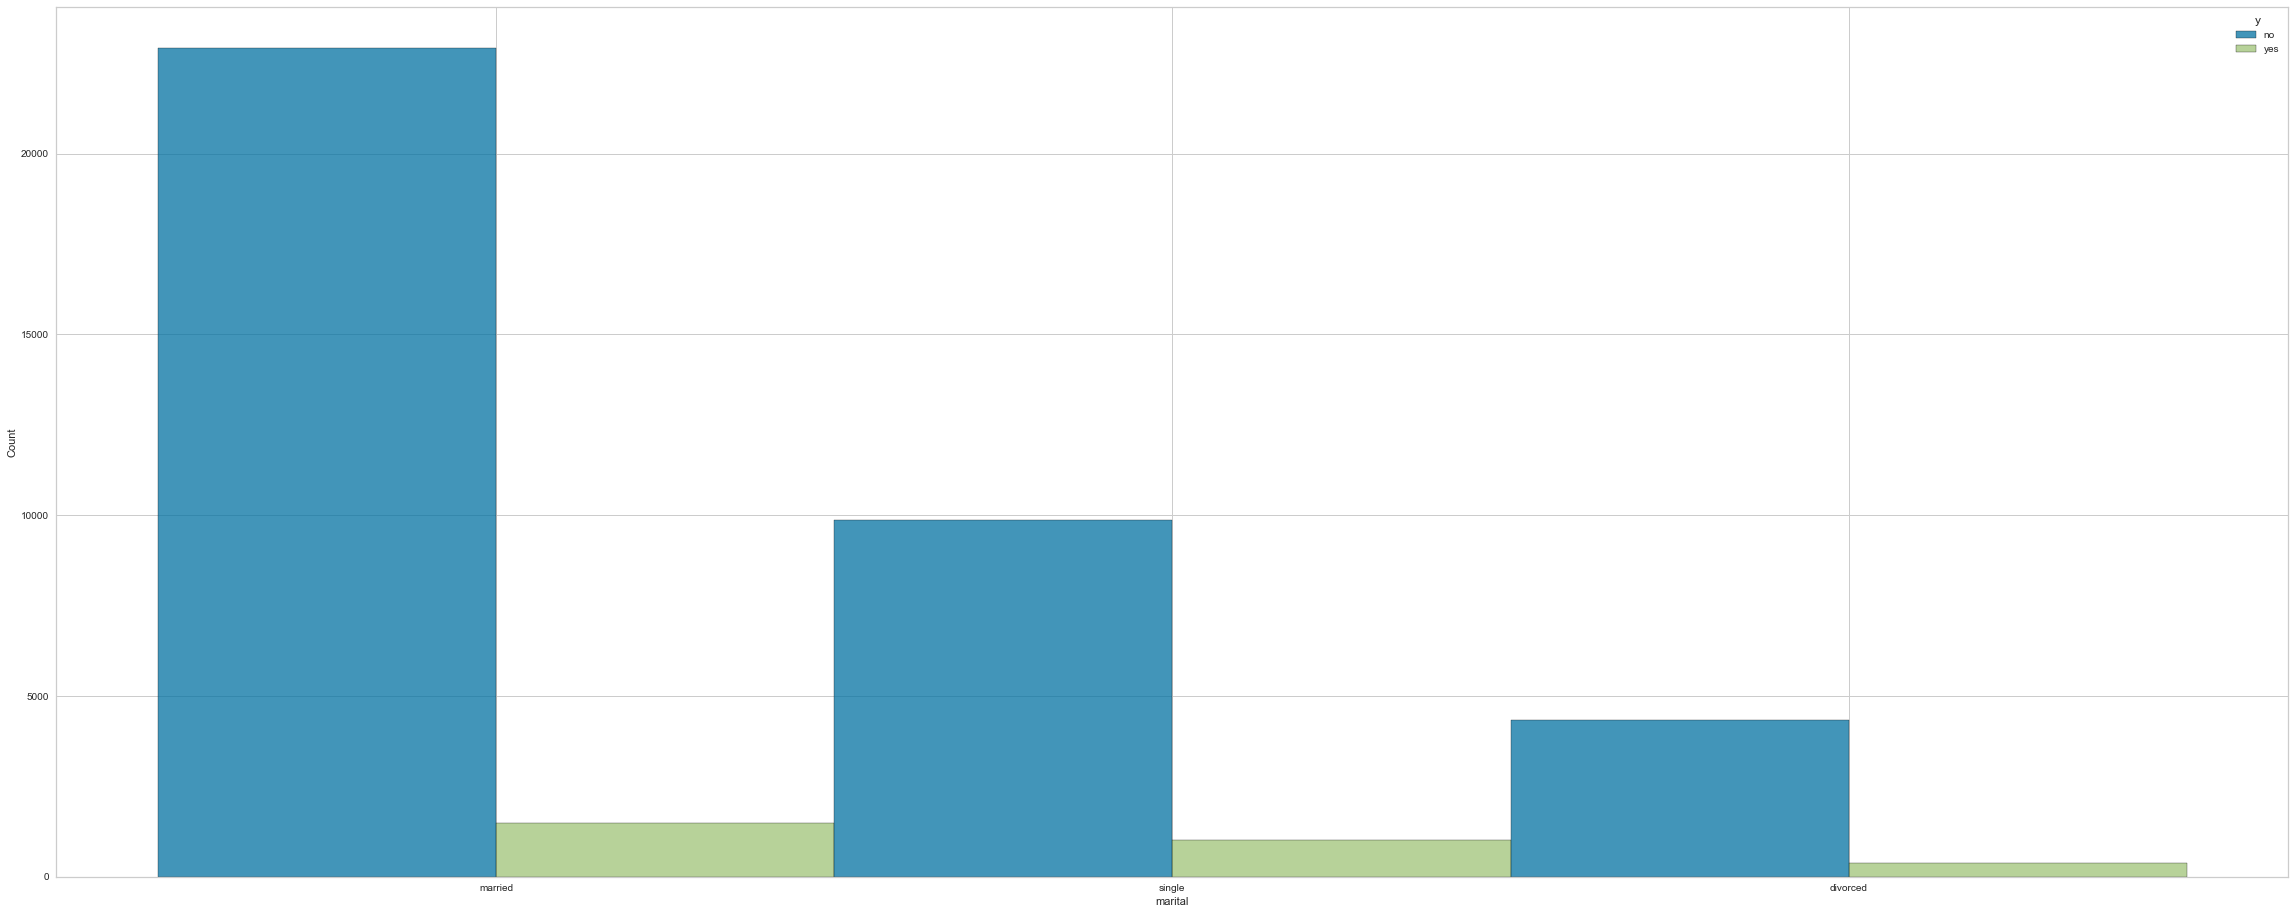

In [128]:
ax = sns.barplot(Term_Deposit_data['marital'].value_counts().index, Term_Deposit_data['marital'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='marital', hue="y", multiple="dodge")
plt.show()

In [129]:
converted_term_deposit['marital'] = Term_Deposit_data['marital'].apply(lambda x: marital_dict[x])

In [130]:
education_dict ={'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
education_dict

{'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}

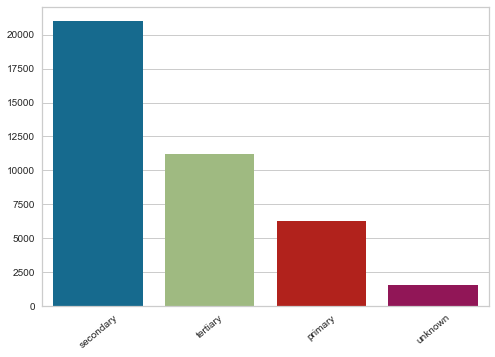

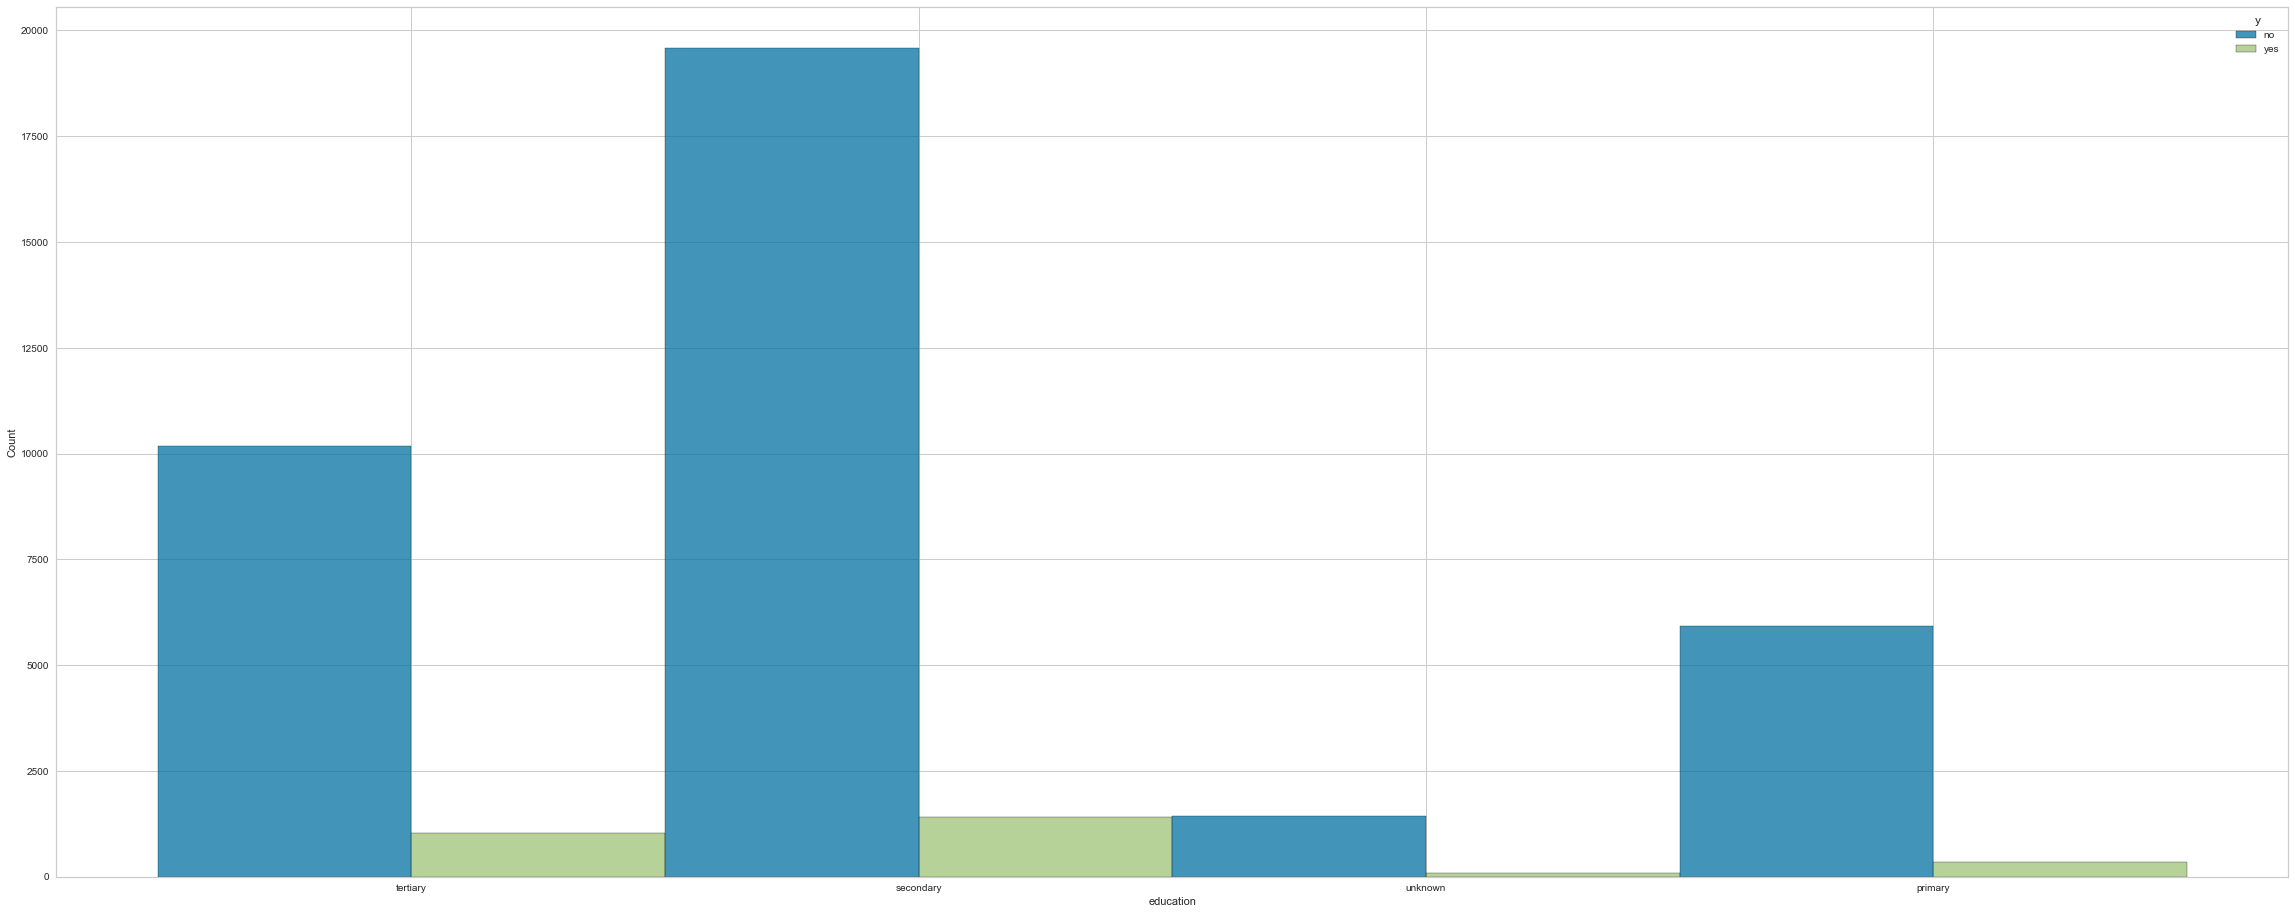

In [131]:
ax = sns.barplot(Term_Deposit_data['education'].value_counts().index, Term_Deposit_data['education'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='education', hue="y", multiple="dodge")
plt.show()

In [132]:
converted_term_deposit['education'] = Term_Deposit_data['education'].apply(lambda x: education_dict[x])

In [133]:
default_dict ={'no': 0, 'yes': 1}
default_dict

{'no': 0, 'yes': 1}

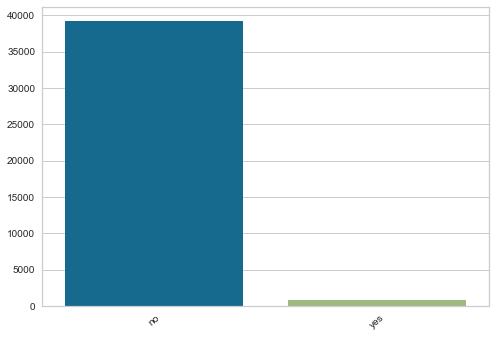

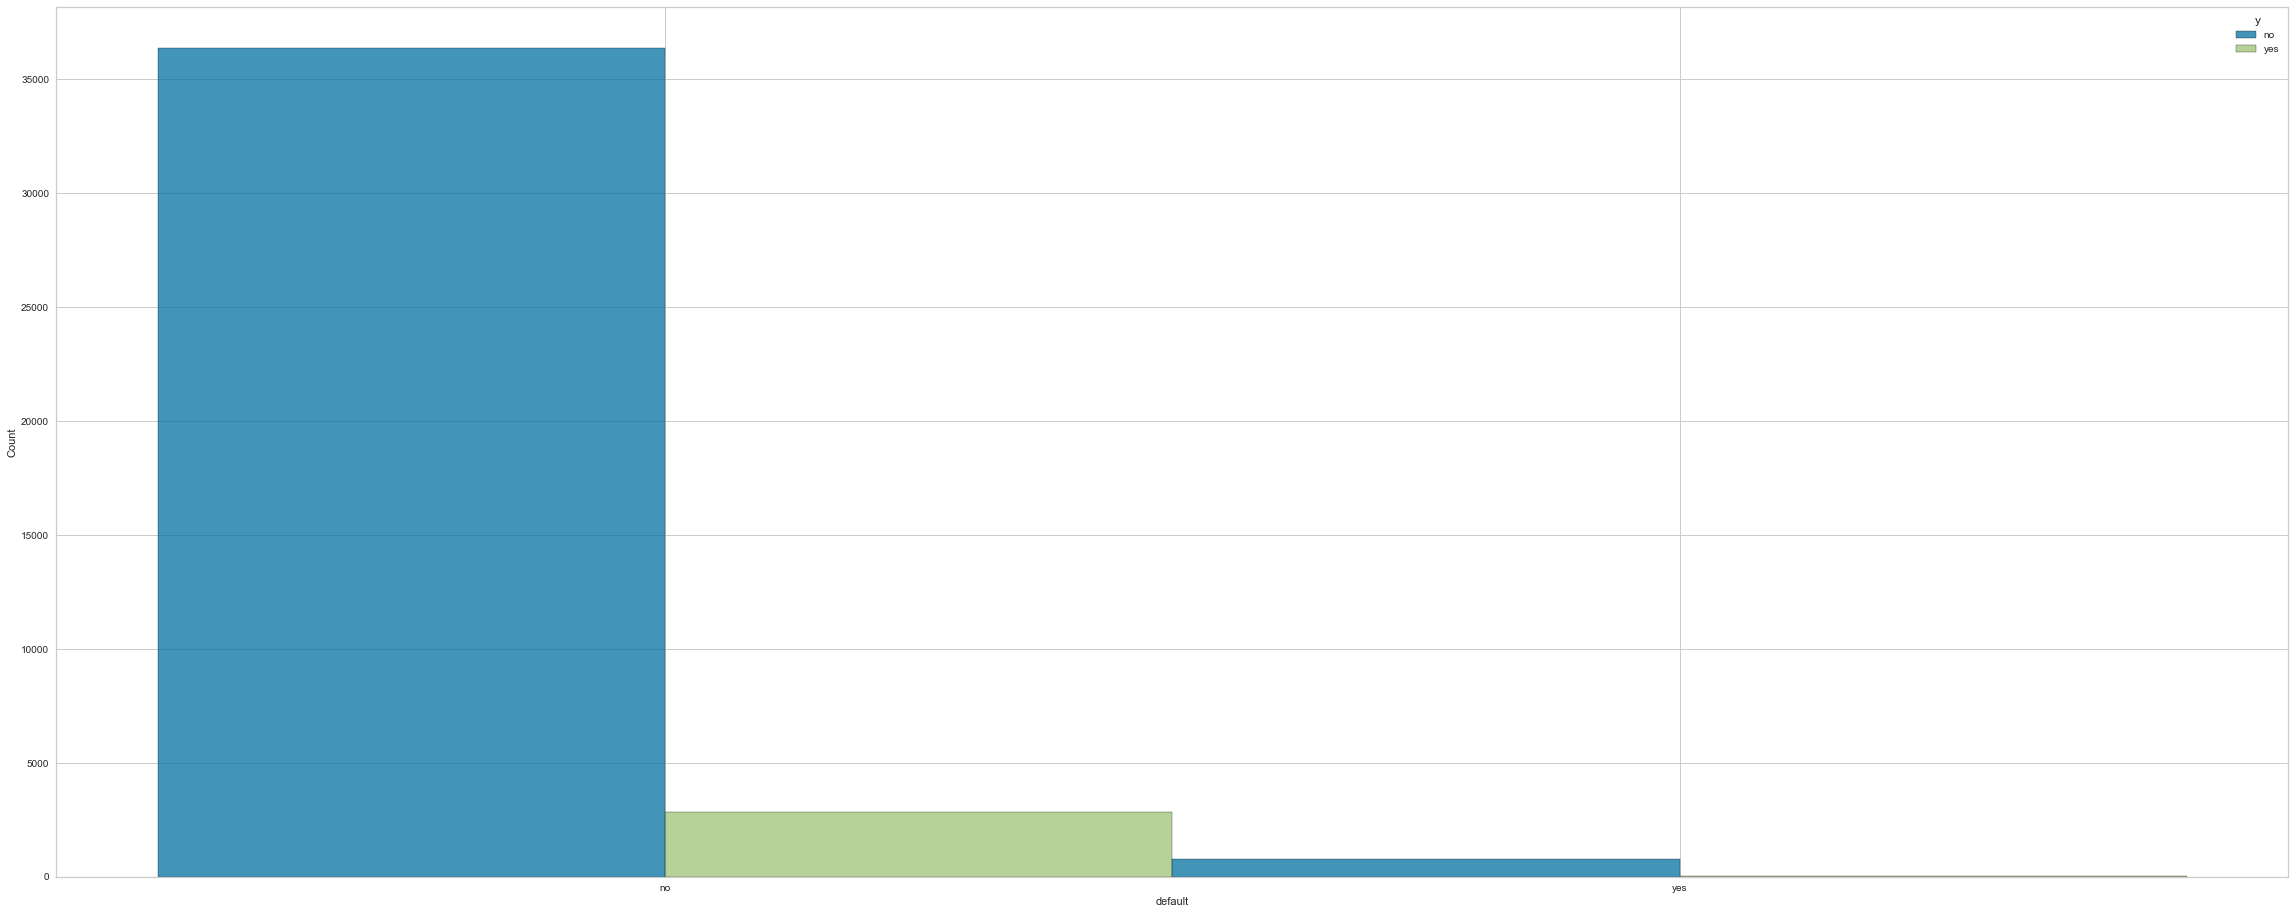

In [134]:
ax = sns.barplot(Term_Deposit_data['default'].value_counts().index, Term_Deposit_data['default'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='default', hue="y", multiple="dodge")
plt.show()

In [135]:
converted_term_deposit['default'] = Term_Deposit_data['default'].apply(lambda x: default_dict[x])

In [136]:
contact_dict ={ contact:i for i, contact in enumerate(list(set(Term_Deposit_data['contact'])))}
contact_dict

{'unknown': 0, 'telephone': 1, 'cellular': 2}

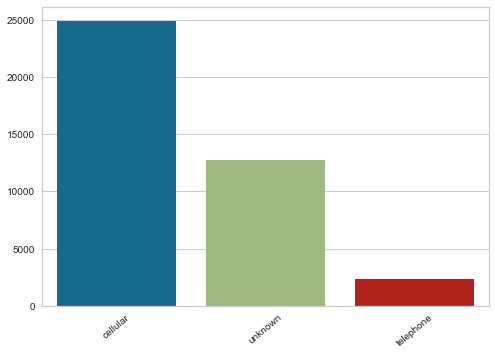

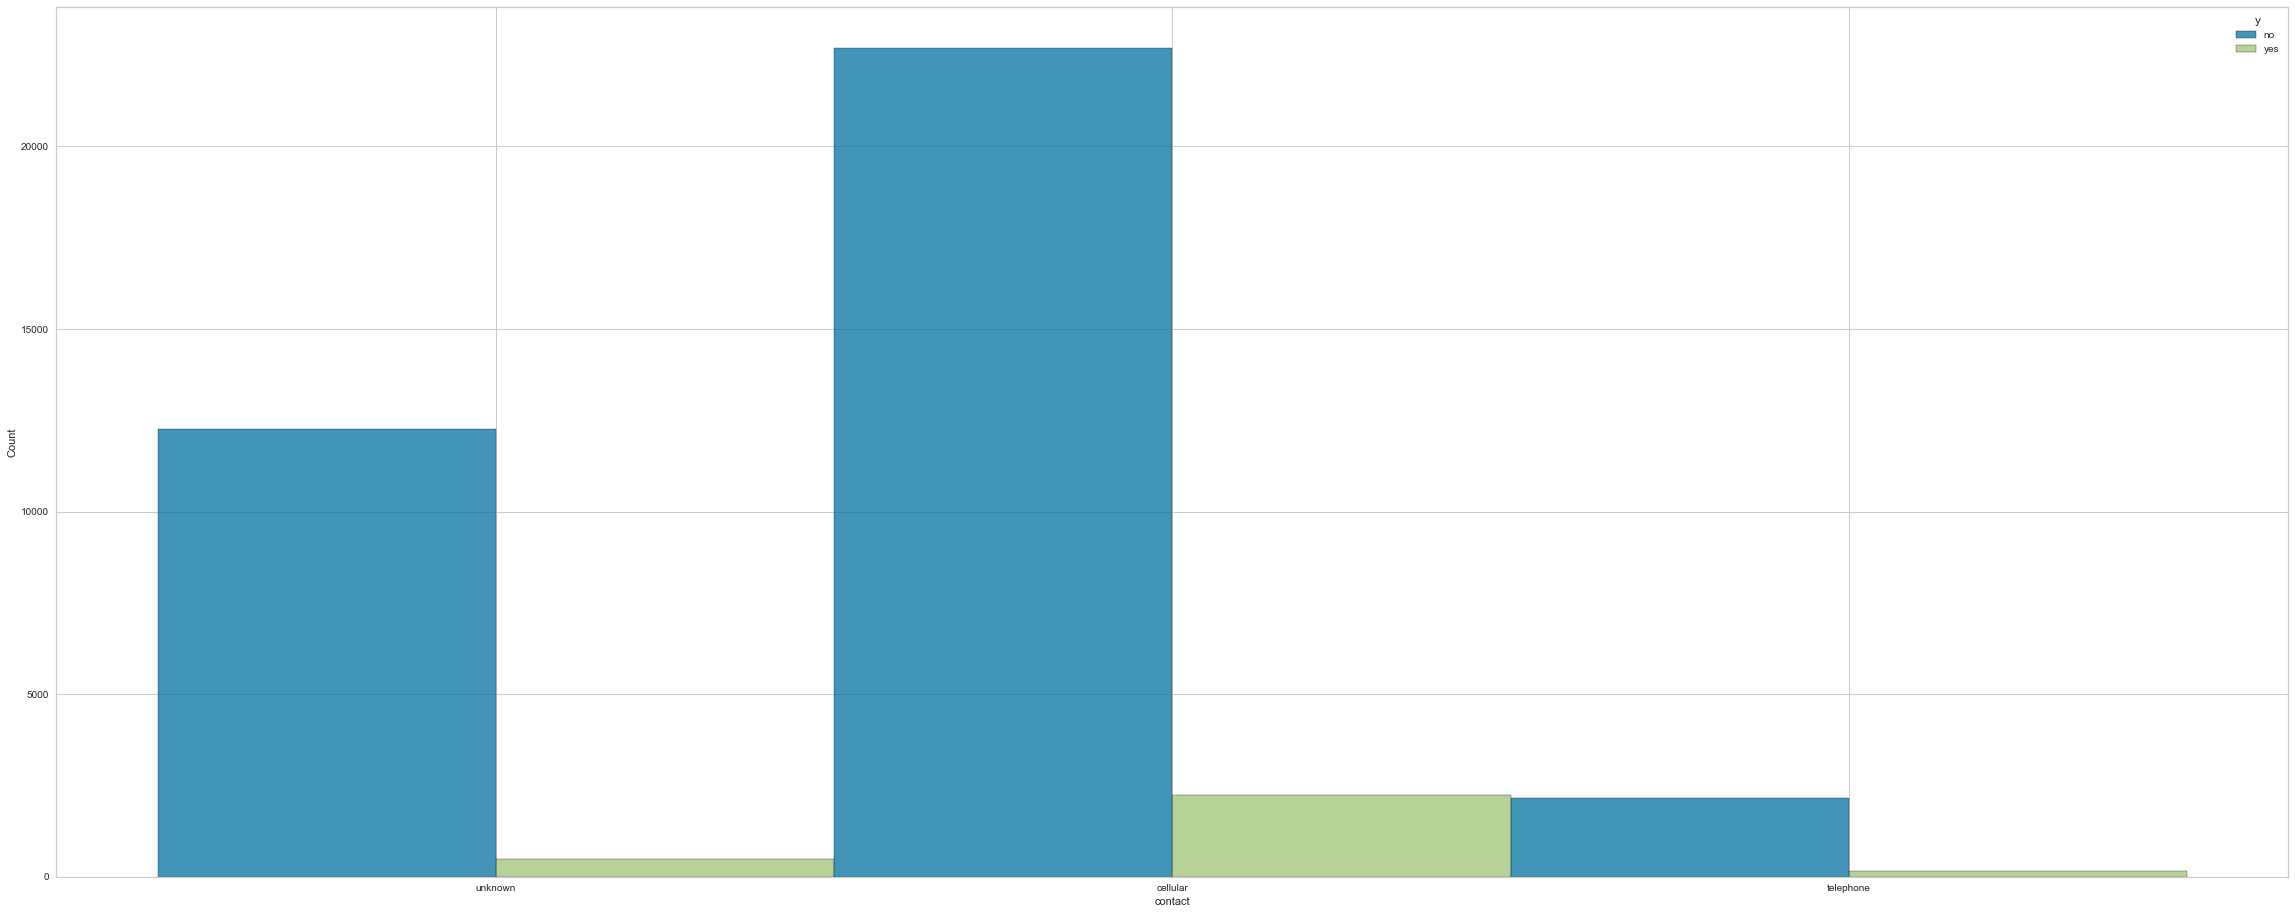

In [137]:
ax = sns.barplot(Term_Deposit_data['contact'].value_counts().index, Term_Deposit_data['contact'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='contact', hue="y", multiple="dodge")
plt.show()

In [138]:
converted_term_deposit['contact'] = Term_Deposit_data['contact'].apply(lambda x: contact_dict[x])

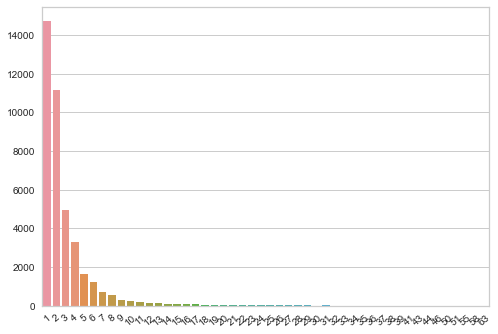

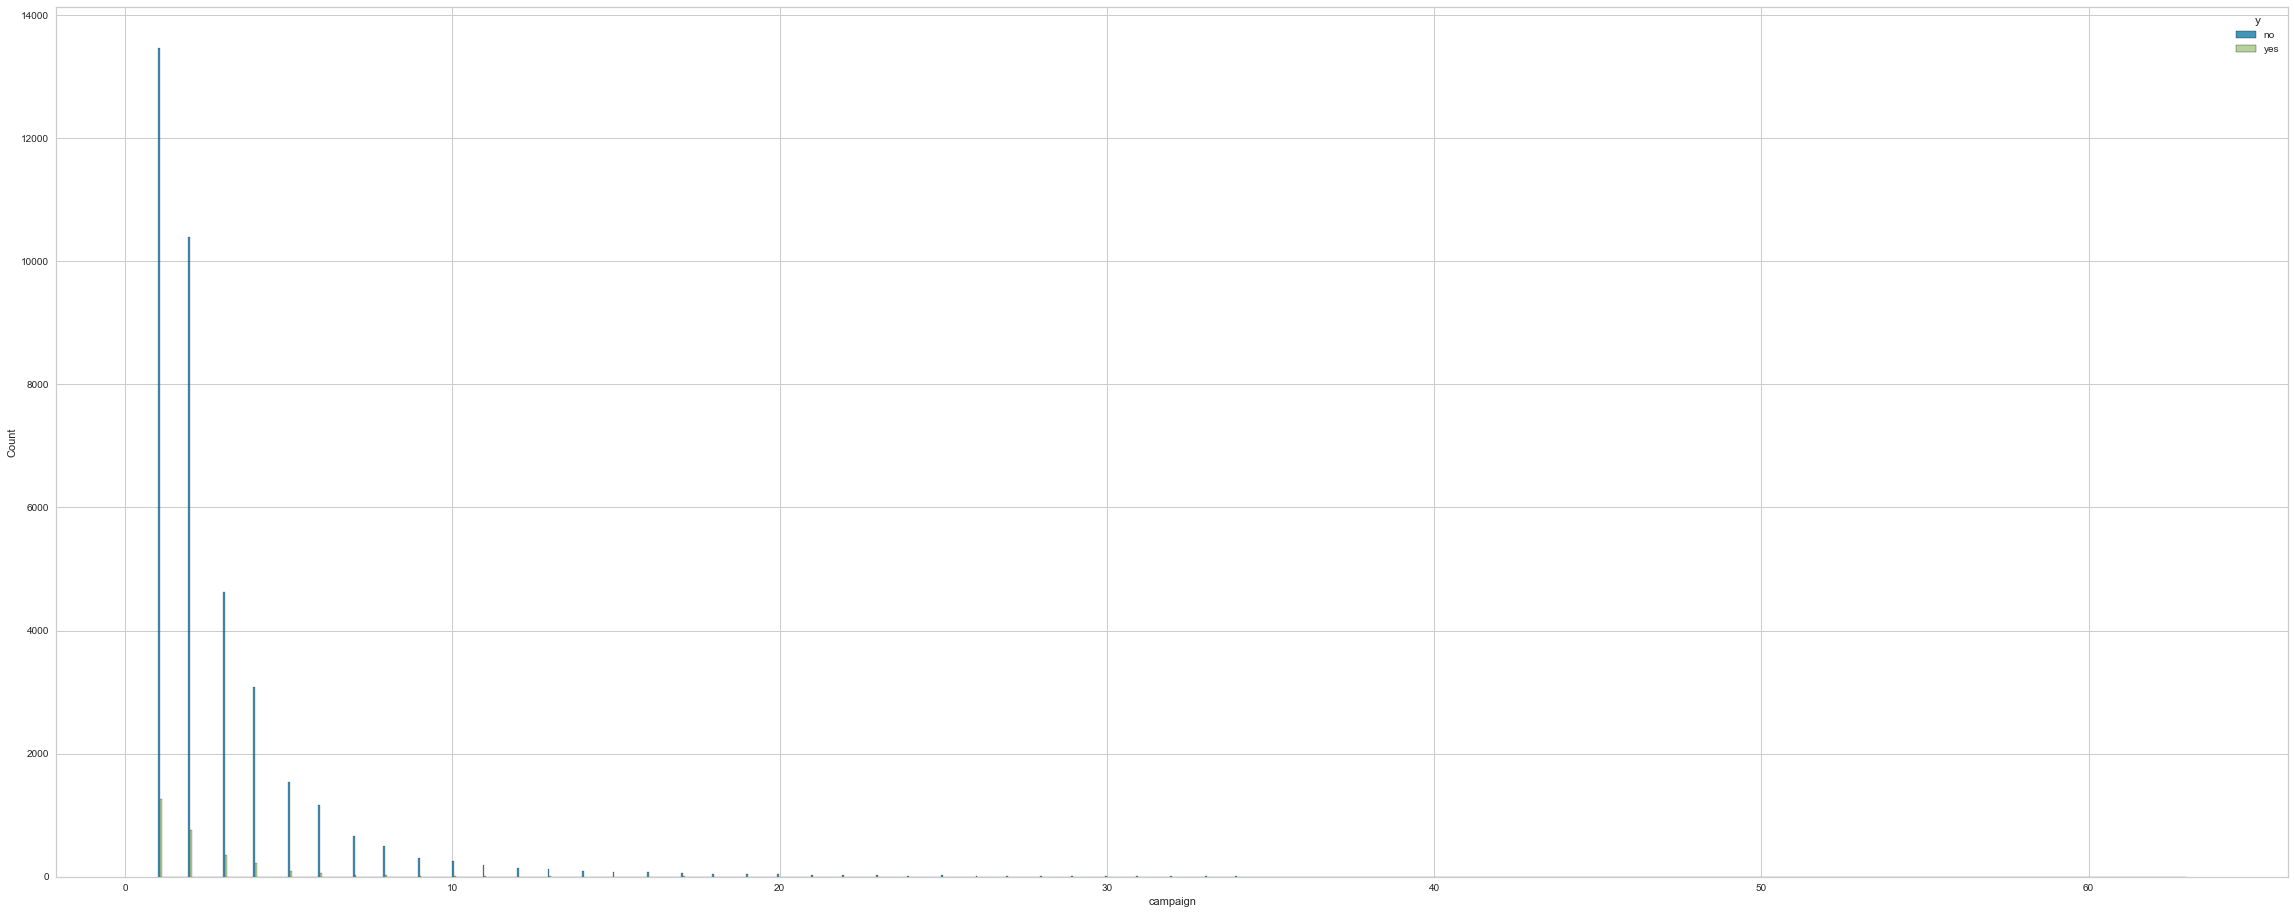

In [139]:
ax = sns.barplot(Term_Deposit_data['campaign'].value_counts().index, Term_Deposit_data['campaign'].value_counts().values)
plt.figure(figsize=(40,16))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
sns.histplot(data=Term_Deposit_data, x='campaign', hue="y", multiple="dodge")
plt.show()

In [140]:
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
converted_term_deposit['month'] = Term_Deposit_data['month'].apply(lambda x: month_dict[x])

In [141]:
converted_term_deposit['y'] = Term_Deposit_data['y'].apply(lambda x:0 if x == 'no' else 1)
converted_term_deposit

,job,marital,education,default,contact,month,y
0,4,1,3,0,0,5,0
1,3,0,2,0,0,5,0
2,11,1,2,0,0,5,0
3,5,1,0,0,0,5,0
4,6,0,0,0,0,5,0
...,...,...,...,...,...,...,...
39995,3,1,3,0,2,6,0
39996,4,0,3,0,2,6,1
39997,7,2,2,0,2,6,1
39998,4,1,3,0,2,6,0


In [147]:
#To find out the importance of categorical features contributed to the model, chi square between feature pairs will be calculated

In [148]:
converted_term_deposit['age'] = Term_Deposit_data['age']
converted_term_deposit['balance'] = Term_Deposit_data['balance']
converted_term_deposit['day'] = Term_Deposit_data['day']
converted_term_deposit['duration'] = Term_Deposit_data['duration']
converted_term_deposit['campaign'] = Term_Deposit_data['campaign']

converted_term_deposit

,job,marital,education,default,contact,month,y,age,balance,day,duration,campaign
0,4,1,3,0,0,5,0,58,2143,5,261,1
1,3,0,2,0,0,5,0,44,29,5,151,1
2,11,1,2,0,0,5,0,33,2,5,76,1
3,5,1,0,0,0,5,0,47,1506,5,92,1
4,6,0,0,0,0,5,0,33,1,5,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3,1,3,0,2,6,0,53,395,3,107,1
39996,4,0,3,0,2,6,1,30,3340,3,238,3
39997,7,2,2,0,2,6,1,54,200,3,170,1
39998,4,1,3,0,2,6,0,34,1047,3,342,1


In [149]:
feature_cat = ['job', 'marital', 'education', 'default', 'contact', 'campaign']
def chi_square(feature, feature2 = 'NA'):
    if feature2 == 'NA':
        feature2 = 'y'
    crosstab = pd.crosstab(converted_term_deposit[feature], converted_term_deposit[feature2], margins=True)
    statistical_value, p_value, deg_of_freedom= chi2_contingency(crosstab.iloc[:-1,:-1])[0:3]
    print('feature: ', feature, ', feature 2: ', feature2,', p value: ', p_value, ', p value > 0.05', p_value > 0.05)

In [150]:
for feature in converted_term_deposit[feature_cat]:
    chi_square(feature)

feature:  job , feature 2:  y , p value:  1.6761348063575326e-26 , p value > 0.05 False
feature:  marital , feature 2:  y , p value:  3.091030601234065e-30 , p value > 0.05 False
feature:  education , feature 2:  y , p value:  8.061910845440752e-21 , p value > 0.05 False
feature:  default , feature 2:  y , p value:  0.21373529827845061 , p value > 0.05 True
feature:  contact , feature 2:  y , p value:  7.242046790893985e-71 , p value > 0.05 False
feature:  campaign , feature 2:  y , p value:  5.174950485116002e-06 , p value > 0.05 False


In [151]:
#As we can see above, default has p value higher than 0.05. The p value indicates that default is not statistically significant. Therefore, we drop default from the dataset

In [152]:
feature_used =[]
for feature1 in converted_term_deposit[feature_cat]:
    for feature2 in converted_term_deposit[feature_cat]:
        if feature1 == feature2 or feature2 in feature_used:
            pass
        else:
            chi_square(feature1, feature2)
    feature_used.append(feature1)
            

feature:  job , feature 2:  marital , p value:  0.0 , p value > 0.05 False
feature:  job , feature 2:  education , p value:  0.0 , p value > 0.05 False
feature:  job , feature 2:  default , p value:  1.448828986492023e-05 , p value > 0.05 False
feature:  job , feature 2:  contact , p value:  2.2774179910412064e-231 , p value > 0.05 False
feature:  job , feature 2:  campaign , p value:  1.0780728833450866e-06 , p value > 0.05 False
feature:  marital , feature 2:  education , p value:  6.413890448184004e-243 , p value > 0.05 False
feature:  marital , feature 2:  default , p value:  0.0005171320247111738 , p value > 0.05 False
feature:  marital , feature 2:  contact , p value:  4.9666756715713015e-27 , p value > 0.05 False
feature:  marital , feature 2:  campaign , p value:  3.899614562268539e-06 , p value > 0.05 False
feature:  education , feature 2:  default , p value:  0.06888688045212739 , p value > 0.05 True
feature:  education , feature 2:  contact , p value:  3.497855131401551e-218

In [153]:
term_deposit = converted_term_deposit.drop(columns=['default'])
term_deposit

,job,marital,education,contact,month,y,age,balance,day,duration,campaign
0,4,1,3,0,5,0,58,2143,5,261,1
1,3,0,2,0,5,0,44,29,5,151,1
2,11,1,2,0,5,0,33,2,5,76,1
3,5,1,0,0,5,0,47,1506,5,92,1
4,6,0,0,0,5,0,33,1,5,198,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,3,1,3,2,6,0,53,395,3,107,1
39996,4,0,3,2,6,1,30,3340,3,238,3
39997,7,2,2,2,6,1,54,200,3,170,1
39998,4,1,3,2,6,0,34,1047,3,342,1


In [154]:
#Pycaret is used to find out the best model for this classification task. 
#In this project, we focus on precision because we want to find out whether who will subscribe the term deposit rather than knowing the prediction accuracy 

In [155]:
from pycaret.classification import *
#set up a session and search for the best models based on accuracy
s1 = setup(term_deposit, target='y', session_id = seed)
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9380,0.9471,0.4150,0.6111,0.4938,0.4621,0.4721,12.0470
lightgbm,Light Gradient Boosting Machine,0.9371,0.9466,0.4145,0.6015,0.4900,0.4578,0.4672,2.3740
gbc,Gradient Boosting Classifier,0.9364,0.9404,0.3470,0.6151,0.4429,0.4120,0.4314,2.6380
xgboost,Extreme Gradient Boosting,0.9349,0.9421,0.4120,0.5757,0.4800,0.4463,0.4535,4.8430
rf,Random Forest Classifier,0.9339,0.9359,0.3060,0.5923,0.4025,0.3714,0.3946,1.4770
lr,Logistic Regression,0.9330,0.9213,0.2532,0.6005,0.3549,0.3257,0.3604,5.0420
lda,Linear Discriminant Analysis,0.9329,0.9255,0.4306,0.5532,0.4835,0.4483,0.4527,0.2160
ada,Ada Boost Classifier,0.9310,0.9279,0.3275,0.5469,0.4087,0.3745,0.3889,0.7610
ridge,Ridge Classifier,0.9305,0.0000,0.1476,0.6006,0.2363,0.2137,0.2734,0.0780
et,Extra Trees Classifier,0.9300,0.9170,0.2292,0.5494,0.3227,0.2925,0.3242,1.4800


In [156]:
import shap
shap.initjs()

In [157]:
#We get around 61% on Gradient Boosting Classifier model for the highest precision. Now we want to examine how those features contribute to the explaination of the model using SHAP

In [158]:
explainer = shap.Explainer(top3[2])

In [159]:
sv = explainer(term_deposit.drop(columns=['y']),check_additivity=False)
sv

.values =
array([[ 3.55509348e-01, -1.83116689e-01, -9.13901100e-02, ...,
         1.84407705e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.59643481e-01, -3.43479613e-01,  1.95572622e-02, ...,
         1.50254961e-01,  2.48719227e-04, -2.52990880e-01],
       [ 2.69684988e-01, -3.58867745e-01, -2.06498703e-01, ...,
         1.86708512e-01,  2.48719227e-04,  2.92606566e-01],
       ...,
       [ 1.01448940e+00, -1.52065585e-01,  7.30661360e-01, ...,
         2.20309256e-01,  1.39662147e-04, -1.83556754e-01],
       [ 1.02259671e+00, -5.66220127e-02,  7.87305968e-01, ...,
         2.98595092e-01,  2.48719227e-04,  1.32777244e-01],
       [ 1.02276204e+00,  5.87161936e-02,  8.58694094e-01, ...,
         2.97653569e-01,  2.48719227e-04, -3.79717950e-02]])

.base_values =
array([[-3.82802949],
       [-3.82802949],
       [-3.82802949],
       ...,
       [-3.82802949],
       [-3.82802949],
       [-3.82802949]])

.data =
array([[  4,   1,   3, ...,   5, 261,   1],
       [  3,   0,  

In [ ]:
#The 2 graphs below shows how the model predicts from a smaple 

In [160]:
shap.force_plot(explainer.expected_value, sv.values[0,:],term_deposit.drop(columns=['y']).iloc[0,:])

In [ ]:
#As shown below for the prediction of sample 1, contract feature contributes the most to lower the subscription chance. Meanwhile, four features - balance, age, duration and campaign do not any influence to the prediction

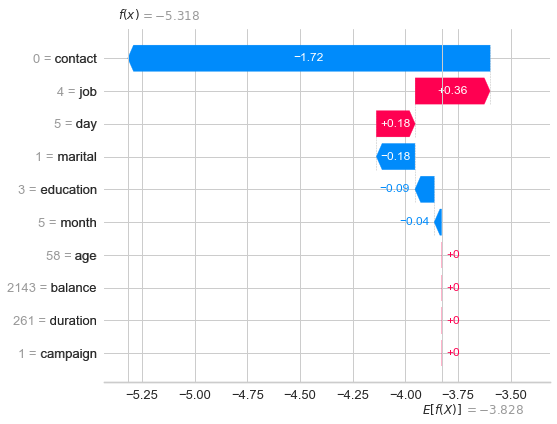

In [161]:
shap_object = shap.Explanation(base_values = sv[0][0].base_values,
values = sv[0].values,
feature_names = term_deposit.drop(columns=['y']).columns,
data = sv[0].data)

shap.plots.waterfall(shap_object)

In [ ]:
#The following graph give a better explaination on the overall mean value of how features impact the prediction.
#Contract is the most important feature on predicting term deposit subscription but duration is not a significant feature to it.
#The prediction result is mostly influenced by contract and balance features  

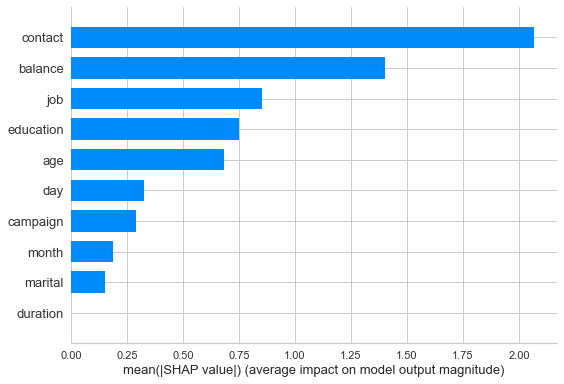

In [163]:
shap.summary_plot(sv.values, term_deposit.drop(columns=['y']), plot_type="bar")

In [ ]:
#In the following graph, we can further understand how the value of feature values impact the prediction. 
#Since the values of some categorical features are not implied by the magnitudes, we can ignore it.
#For the continuous features, lower balance push the client more likely to subscribe the term deposit while lower education has the same effect.

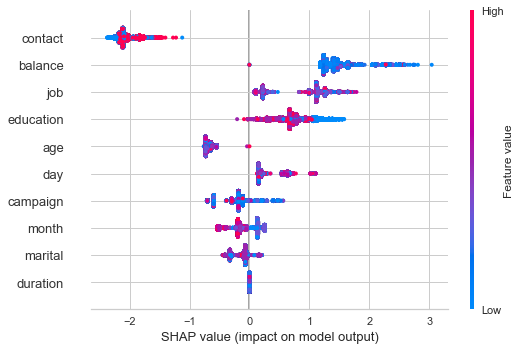

In [164]:
shap.plots.beeswarm(sv)